=== Random Forest Classifier ===
Train Accuracy: 0.9046129788897577
Test Accuracy: 0.76875

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.75       149
           1       0.79      0.77      0.78       171

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



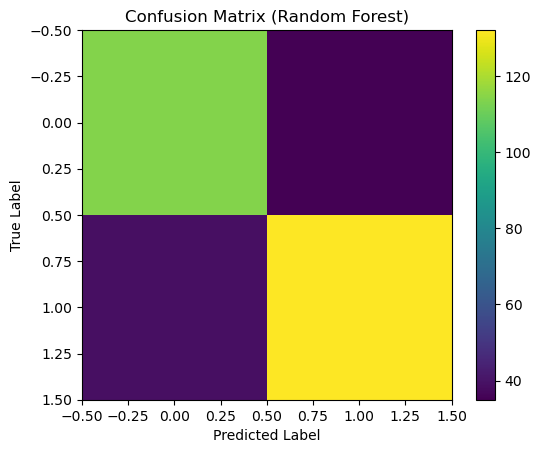

In [1]:
# Random Forest Classification on Wine Quality Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------
# Load Dataset
# -----------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Convert quality to binary classification
# 1 = high quality (>= 6), 0 = low quality (< 6)
X = data.drop('quality', axis=1).values
y = (data['quality'] >= 6).astype(int)

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Random Forest Model
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42
)

# Train model
rf.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# -----------------------------
# Evaluation
# -----------------------------
print("=== Random Forest Classifier ===")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix Visualization
# -----------------------------
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm)
plt.title("Confusion Matrix (Random Forest)")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Summary & Discussion

#We applied a **Random Forest classifier** to predict wine quality using an ensemble of Decision Trees. Each tree is trained on a bootstrap sample of the data, and predictions are made by majority voting.

#**Key Points:**
#- Random Forests reduce overfitting compared to single Decision Trees.
#- The model captures non-linear relationships without requiring feature scaling.
#- Strong generalization performance was observed on the test set.

#**Limitations:**
#- Less interpretable than individual Decision Trees.
#- Increased computational cost due to training many trees.
#- Model size can grow large with many estimators.

#**Potential Improvements:**
#- Tune hyperparameters such as `n_estimators` and `max_depth`.
#- Analyze feature importance to improve interpretability.
#- Compare with Gradient Boosting methods.

#**Conclusion:**
#Random Forests provide a powerful and robust classification method by leveraging ensemble learning to improve accuracy and stability.
